<a href="https://colab.research.google.com/github/Yashwant72/Plant_DiseaseDetection/blob/main/Image_ProR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/Apple_DS.zip" -d "/content"

Archive:  /content/drive/MyDrive/Apple_DS.zip
   creating: /content/Apple_DS/
   creating: /content/Apple_DS/Apple___Cedar_apple_rust/
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/f0d04e6e-18c3-4c74-a56c-609b5035f358___FREC_C.Rust 4231_newGRR.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/ea119d19-1b3a-4767-af1d-e8b148a3bb8d___FREC_C.Rust 3579_new30degFlipTB.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/fc477749-2fe6-48a5-9393-5eedeb7cedc3___FREC_C.Rust 3826_new30degFlipTB.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/eb94b818-0cd7-4233-8315-1138c258eb88___FREC_C.Rust 0164_new30degFlipLR.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/f167b41b-c294-47e4-aed9-9ff7923176a5___FREC_C.Rust 3969_90deg.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/fcfc7057-7de6-466b-9f7e-9b767deaf266___FREC_C.Rust 3807_new30degFlipTB.JPG  
  inflating: /content/Apple_DS/Apple___Cedar_apple_rust/fdaecc2c-c48c-447d-9cdc-5d52

In [ ]:
data_dir = "/content/Apple_DS"

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3771 files belonging to 4 classes.
Using 3017 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3771 files belonging to 4 classes.
Using 754 files for validation.


In [ ]:
#class_names = train_ds.class_names
#print(train_ds.class_names)

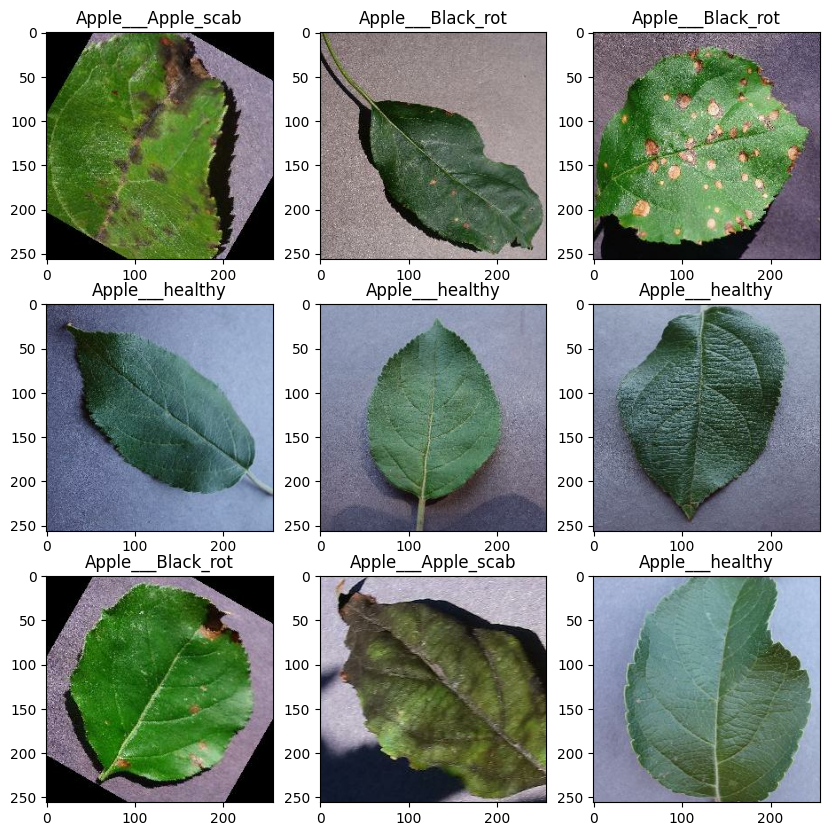

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
95/95 [==============================] - 20s 59ms/step - loss: 0.9842 - accuracy: 0.6152 - val_loss: 0.3905 - val_accuracy: 0.8607
Epoch 2/10
95/95 [==============================] - 4s 37ms/step - loss: 0.3194 - accuracy: 0.8810 - val_loss: 0.2096 - val_accuracy: 0.9390
Epoch 3/10
95/95 [==============================] - 4s 37ms/step - loss: 0.1726 - accuracy: 0.9377 - val_loss: 0.1336 - val_accuracy: 0.9589
Epoch 4/10
95/95 [==============================] - 4s 41ms/step - loss: 0.1341 - accuracy: 0.9486 - val_loss: 0.1536 - val_accuracy: 0.9430
Epoch 5/10
95/95 [==============================] - 4s 38ms/step - loss: 0.0846 - accuracy: 0.9702 - val_loss: 0.1047 - val_accuracy: 0.9708
Epoch 6/10
95/95 [==============================] - 4s 37ms/step - loss: 0.0680 - accuracy: 0.9778 - val_loss: 0.1319 - val_accuracy: 0.9469
Epoch 7/10
95/95 [==============================] - 4s 37ms/step - loss: 0.0611 - accuracy: 0.9748 - val_loss: 0.0911 - val_accuracy: 0.9721
Epoch 8/10
9

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

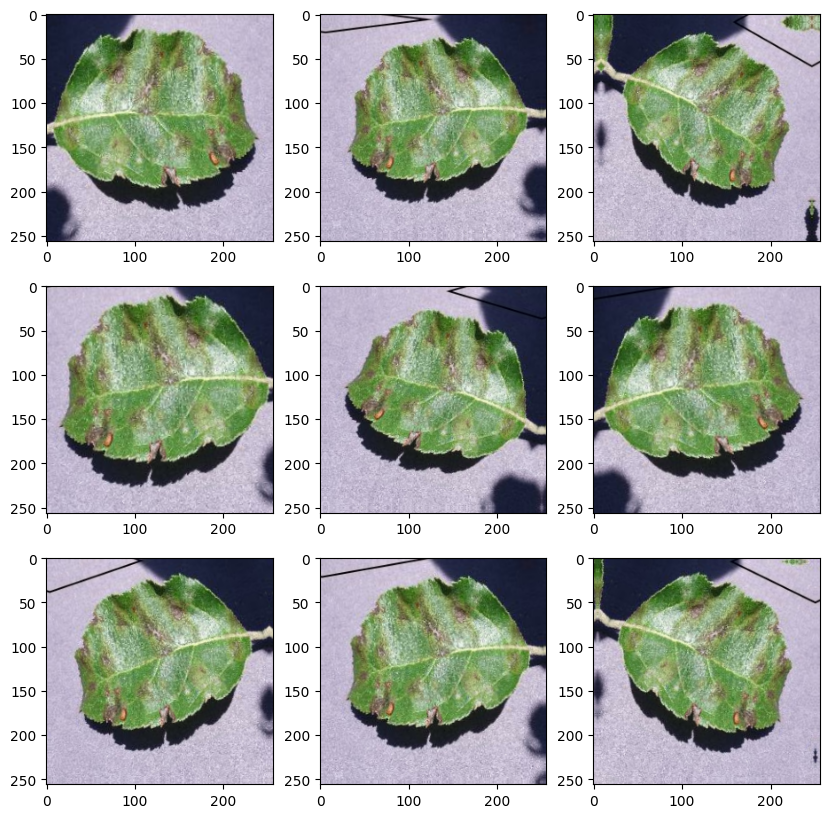

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("on")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
95/95 [==============================] - 9s 65ms/step - loss: 0.8333 - accuracy: 0.6666 - val_loss: 1.7049 - val_accuracy: 0.6273
Epoch 2/15
95/95 [==============================] - 6s 65ms/step - loss: 0.4173 - accuracy: 0.8379 - val_loss: 0.9424 - val_accuracy: 0.7905
Epoch 3/15
95/95 [==============================] - 6s 61ms/step - loss: 0.2858 - accuracy: 0.8939 - val_loss: 1.2056 - val_accuracy: 0.7613
Epoch 4/15
95/95 [==============================] - 6s 64ms/step - loss: 0.2359 - accuracy: 0.9112 - val_loss: 1.8742 - val_accuracy: 0.7560
Epoch 5/15
95/95 [==============================] - 6s 62ms/step - loss: 0.2145 - accuracy: 0.9244 - val_loss: 0.5951 - val_accuracy: 0.8607
Epoch 6/15
95/95 [==============================] - 6s 64ms/step - loss: 0.1490 - accuracy: 0.9503 - val_loss: 1.1123 - val_accuracy: 0.8170
Epoch 7/15
95/95 [==============================] - 6s 61ms/step - loss: 0.1528 - accuracy: 0.9476 - val_loss: 1.2079 - val_accuracy: 0.8276
Epoch 8/15
95

In [ ]:
pathk = '/content/Apple_DS/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003_270deg.JPG'

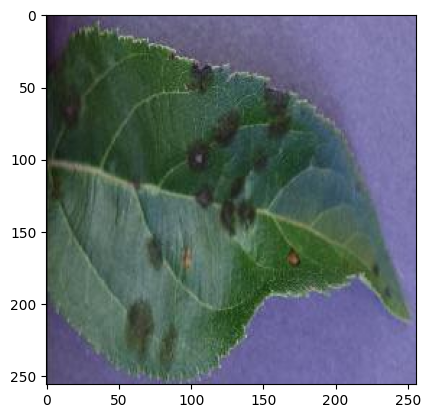

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(pathk)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
img = keras.preprocessing.image.load_img(
    pathk, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 209ms/step
This image most likely belongs to Apple___Apple_scab with a 99.78 percent confidence.


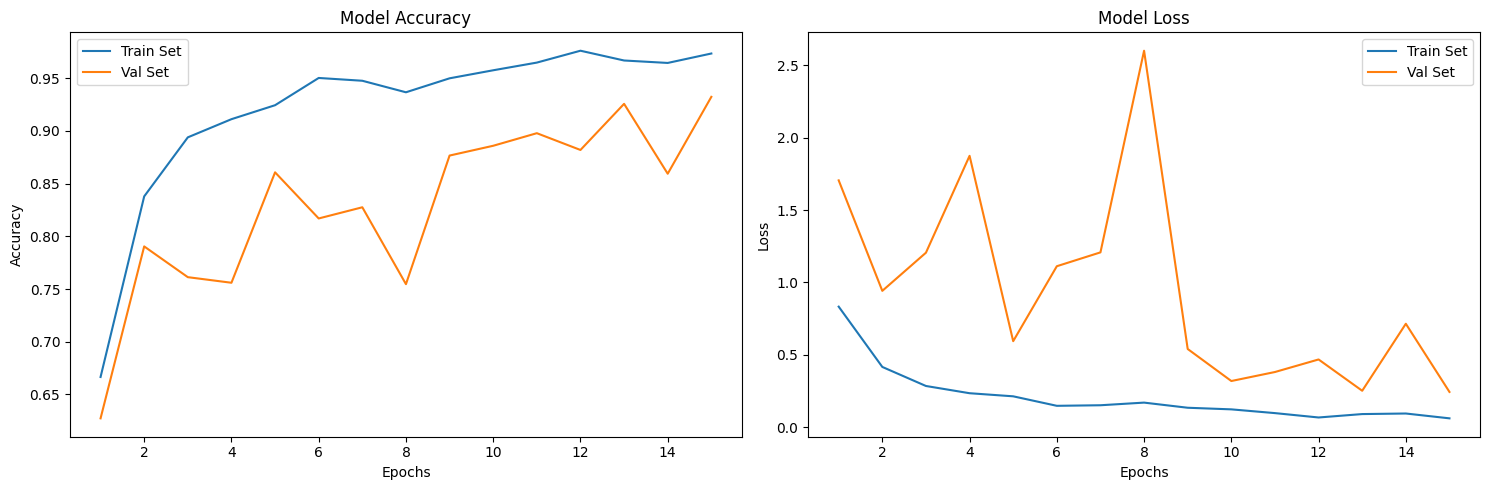

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(
    val_ds
)

24/24 [==============================] - 0s 18ms/step - loss: 0.2448 - accuracy: 0.9324


[0.24479267001152039, 0.9323607683181763]

In [ ]:
def learning_curve(model_fit, key='accuracy', ylim=(0, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'val'], loc='best')
    plt.show()

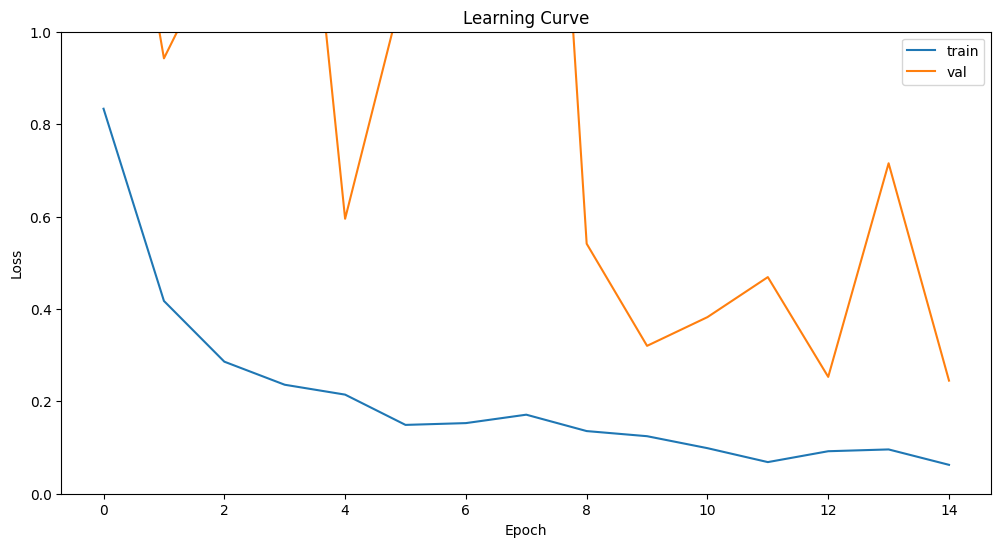

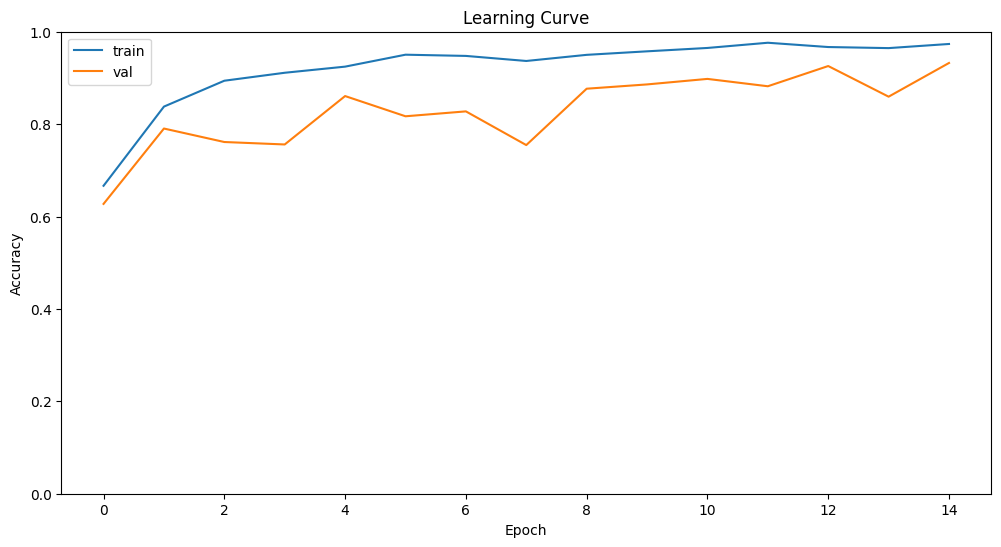

In [ ]:
learning_curve(history,'loss', ylim=(0,1))
learning_curve(history, 'accuracy', ylim=(0,1))